### Ridge Regression, Lasso Regression

In [114]:
from google.colab import files
uploaded = files.upload()

Saving housing_X_test.csv to housing_X_test (1).csv
Saving housing_X_train.csv to housing_X_train (1).csv
Saving housing_y_test.csv to housing_y_test (1).csv
Saving housing_y_train.csv to housing_y_train (1).csv


In [115]:
import pandas as pd
import io
housing_X_test = pd.read_csv(io.BytesIO(uploaded['housing_X_test.csv']), header=None)
housing_y_test = pd.read_csv(io.BytesIO(uploaded['housing_y_test.csv']), header=None)
housing_X_train = pd.read_csv(io.BytesIO(uploaded['housing_X_train.csv']), header=None)
housing_y_train = pd.read_csv(io.BytesIO(uploaded['housing_y_train.csv']), header=None)

### Part a

In [116]:
def gradient_descent_for_ridge_regression(X_train, y_train, X_test, y_test, max_pass, step_size, lam, tol):
  d = X_train.shape[1]
  w = np.zeros((d, 1))
  n = X_train.shape[0]
  b = 0
  training_loss = [0 for i in range(0, max_pass)]
  for t in range(0, max_pass):
    training_loss[t] = (1 / (2*n))* (np.linalg.norm(X_train @ w + b - y_train))**2 + lam * (np.linalg.norm(w))**2
    w_prime = (1 / n) *(X_train.T @ (X_train @ w + b - y_train)) + 2 * lam * w
    b_prime = np.sum(X_train @ w + b - y_train) / n
    prev_w = w
    w = w - w_prime * step_size
    b = b - b_prime * step_size
    if np.linalg.norm(w - prev_w) <= tol:
      break
  return w, b, training_loss

In [117]:
def gradient_descent_for_lasso_regression(X_train, y_train, X_test, y_test, max_pass, step_size, lam, tol):
  d = X_train.shape[1]
  w = np.zeros((d, 1))
  n = X_train.shape[0]
  b = 0
  training_loss = [0 for i in range(0, max_pass)]
  for t in range(0, max_pass):
    training_loss[t] = (1 / (2*n))* (np.linalg.norm(X_train @ w + b - y_train))**2 + lam * np.linalg.norm(w)
    w_prime = (1 / n) *(X_train.T @ (X_train @ w + b - y_train)) + lam
    b_prime = np.sum(X_train @ w + b - y_train) / n
    prev_w = w
    w = w - w_prime * step_size
    b = b - b_prime * step_size
    if np.linalg.norm(w - prev_w) <= tol:
      break
  return w, b, training_loss

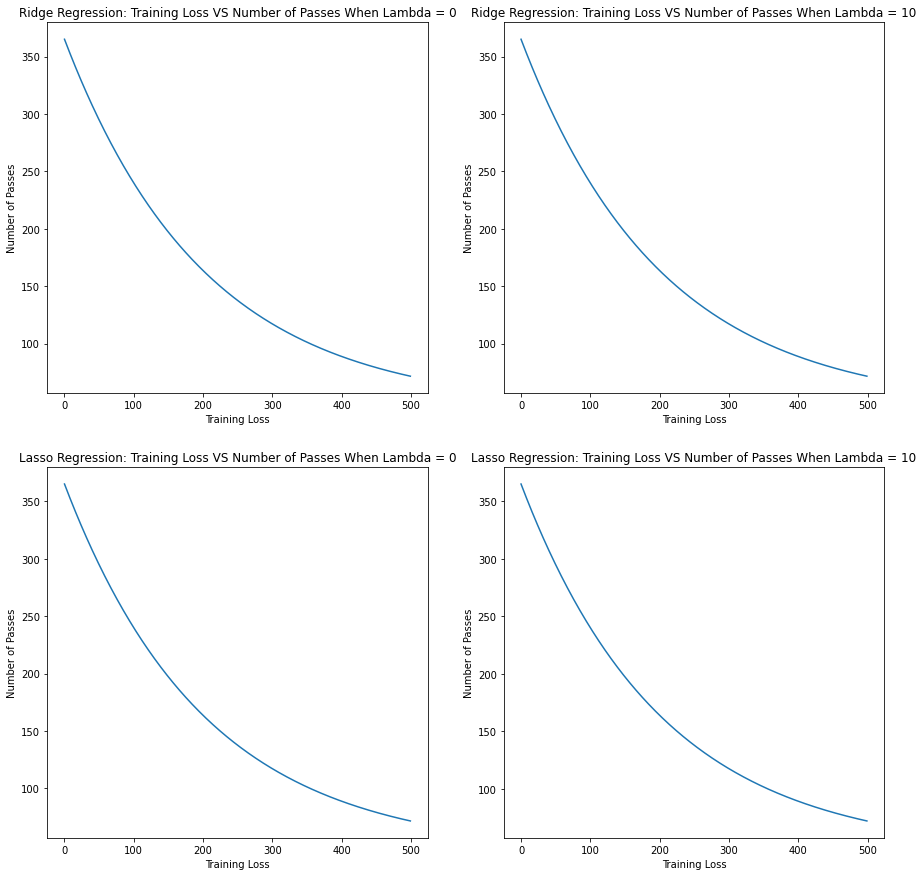

In [119]:
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import time
n = housing_X_train.shape[1]
step_size = 0.00000001
max_pass = 500
tol = 1.e-10

fig, axs = plt.subplots(2, 2, figsize=(15,15))
def plota():
  training_losses = []
  training_error = []
  test_error = []
  times = []
  n = housing_X_train.T.shape[0]
  loc = 0
  for i in [0, 10]:
    start_time = time.time()
    w, b, training_loss = gradient_descent_for_ridge_regression(housing_X_train.T, housing_y_train, housing_X_test.T, housing_y_test, max_pass, step_size, i, tol)
    times += [time.time() - start_time]
    training_losses += [training_loss[-1]]
    training_error += [((np.linalg.norm(housing_X_train.T @ w + b - housing_y_train))**2) / (2*n)]
    test_error += [(np.linalg.norm(housing_X_test.T @ w + b  - housing_y_test)**2) / (2*n)]
    axs[0,loc].plot(training_loss)
    axs[0,loc].set_title("Ridge Regression: Training Loss VS Number of Passes When Lambda = " + str(i))
    loc += 1
  loc -= 2

  for i in [0, 10]:
    start_time = time.time()
    w, b, training_loss = gradient_descent_for_lasso_regression(housing_X_train.T, housing_y_train, housing_X_test.T, housing_y_test, max_pass, step_size, i, tol)
    times += [time.time() - start_time]
    training_losses += [training_loss[-1]]
    training_error += [((np.linalg.norm(housing_X_train.T @ w + b - housing_y_train))**2) / (2*n)]
    test_error += [(np.linalg.norm(housing_X_test.T @ w + b  - housing_y_test)**2) / (2*n)]    
    axs[1,loc].plot(training_loss)
    axs[1,loc].set_title("Lasso Regression: Training Loss VS Number of Passes When Lambda = " + str(i))
    loc += 1
  for ax in axs.flat:
    ax.set(xlabel='Training Loss', ylabel='Number of Passes')
  return training_losses, training_error, test_error, times

training_losses, training_error, test_error, times = plota()

Text(0.5, 1.0, 'Ridge Regression - Gradient Descent')

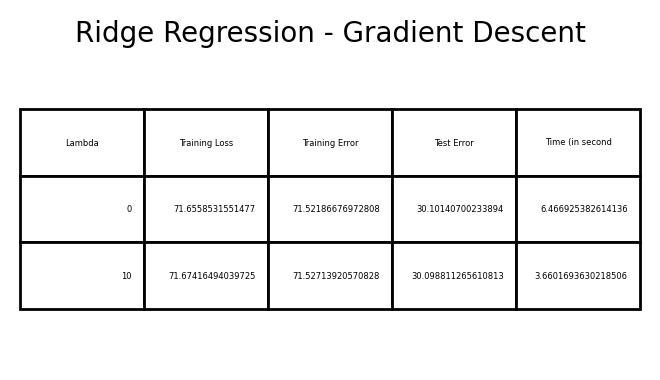

In [120]:
plt.figure(figsize=(4, 2), dpi=200)
data=[[0, training_losses[0], training_error[0], test_error[0], times[0]],
      [10, training_losses[1], training_error[1], test_error[1], times[1]]]
column_labels=["Lambda", "Training Loss", "Training Error", "Test Error", "Time (in second"]
tab = plt.table(cellText=data,colLabels=column_labels, loc="center")
tab.scale(1,2)
plt.axis("off")
plt.title("Ridge Regression - Gradient Descent", size=10)

Text(0.5, 1.0, 'Lasso Regression - Gradient Descent')

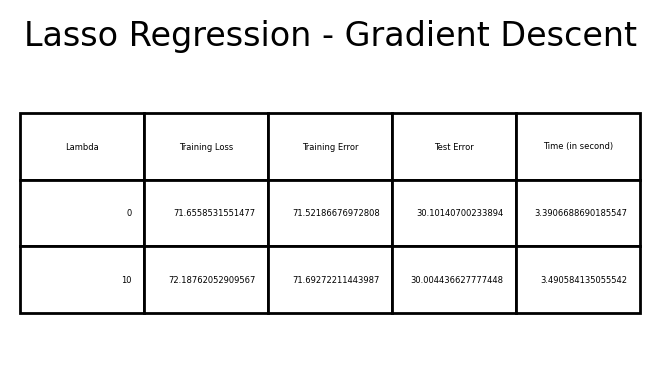

In [122]:
plt.figure(figsize=(4, 2), dpi=200)
data=[[0, training_losses[2], training_error[2], test_error[2], times[2]],
      [10, training_losses[3], training_error[3], test_error[3], times[3]]]
column_labels=["Lambda", "Training Loss", "Training Error", "Test Error", "Time (in second)"]
tab = plt.table(cellText=data,colLabels=column_labels, loc="center")
tab.scale(1,2)
plt.axis("off")
plt.title("Lasso Regression - Gradient Descent")

##### When lambda = 0, Lasso is faster. When lambda = 10, is also faster. Besides, Lasso has lower test error. Hence, Lasso is better.


### Part b

In [123]:
def closed_form_ridge_regression(X_train, y_train, lam):
  d = X_train.shape[1]
  n = X_train.shape[0]
  b = 0
  p = np.c_[np.c_[((2*lam*n)**0.5) *np.identity(d)], np.zeros(d)]
  X_train = np.concatenate((np.c_[X_train, np.ones(n)], p))
  y_train = np.concatenate((y_train.T[0], np.zeros(d)))
  a = X_train.T @ X_train
  # y = y_train.reshape((len(y_train), 1))
  # print(X_train.shape, y.shape)
  b = X_train.T @ y_train
  w = np.linalg.solve(a, b)
  return w

### Part c

In [125]:
import time
def plotc():  
  training_loss = []
  training_error = []
  test_error = []
  times = []
  for lam in [0, 10]: 
    start_time = time.time()
    w = closed_form_ridge_regression(housing_X_train.T, np.array(housing_y_train), lam)
    times += [time.time()-start_time]
    training_loss += [(1 / (2*n))* (np.linalg.norm(pd.DataFrame(housing_X_train.T @ w[:-1] + w[-1]) - housing_y_train))**2 + lam * np.linalg.norm(w[:-1])]
    training_error += [((np.linalg.norm(pd.DataFrame(housing_X_train.T @ w[:-1] + w[-1]) - housing_y_train))**2) / (2*n)]
    test_error += [(np.linalg.norm(pd.DataFrame(housing_X_test.T @ w[:-1] + w[-1])  - housing_y_test)**2) / (2*n)]
  return training_loss, training_error, test_error
training_loss, training_error, test_error = plotc()

Text(0.5, 1.0, 'Ridge Regression - Closed Formed')

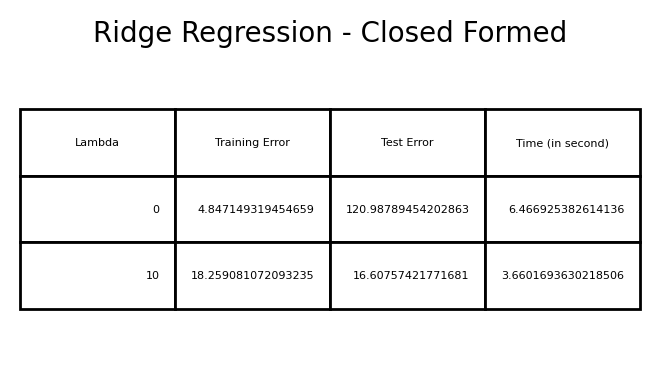

In [126]:
plt.figure(figsize=(4, 2), dpi=200)
data=[[0, training_error[0], test_error[0], times[0]],
      [10, training_error[1], test_error[1], times[1]]]
column_labels=["Lambda", "Training Error", "Test Error", "Time (in second)"]
tab = plt.table(cellText=data,colLabels=column_labels, loc="center")
tab.scale(1,2)
plt.axis("off")
plt.title("Ridge Regression - Closed Formed", size=10)

##### For Ridge Regression, Gradient Descent has lower Test Error so it is better than the other. Moreover, we may not be able to find every closed form solution. Thus, Gradient Descent is a better choice.